# Machine Learning Tutorials

In machine learning a model refers to a method which implement a ML algorithm. Also in scikit-learn, models are called estimator.

We have two types of parameters in ML:
1. Parameters that estimator learns and computes from the input data
2. Parameters which we can initial them before use.(Hyperparameter)

Example:
In K-NN algorithm, K is a hyperparameter.

------------------------------------------------------------------------------------------------------------

## Problem #1 K-NN algorithm with DIGITs dataset

    Digits dataset is a builtin dataset which installs with scikit learn package. This datasets includes the numbers 0 to 9 so in this dataset we have 9 category. This dataset also has 1797 records which are 8\*8 pixels picture. All of the pictures are handwriting numbers and we want to use these picture to train our estimator to predict a handwriting number.

    First for simply we don't define the hyperparameter for our program. We use the default value that these variables have. It's good to know that in the real world we try to reach the best estimator by changing the hyperparameters values which is known as hyperparameter tuning.

------------------------------

### Load the data set with scikit learn

In [26]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt

digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [17]:
data_df = pd.DataFrame(digits.data)
data_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [18]:
digits.data.shape

(1797, 64)

In [21]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [20]:
target_df = pd.DataFrame(digits.target, columns=["Label"])
target_df

,Label
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [11]:
digits.target.shape

(1797,)

Images instance consist of an array 8\*8 pixels for each of the data we have.

In [23]:
digits.images.shape

(1797, 8, 8)

Below you can see one of the images:

<Figure size 432x288 with 0 Axes>

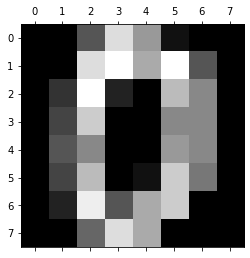

In [32]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In this 8\*8 pixels picture you can see  the number.

----

#### Readying the data

    Scikit-learn's algorithms need data with float number which are in 2-dimention array(Like a datafram type in pandas) which each of the rows are our data and records(instance) and each columns are each of those features. If we want to show these data in one single line we must change these 2-dim data into 1-dim data like what we did earlier.
    
    Note that if the data we want to use them are having a category characteristic(generally in data in string type like dog or cat categories.) we have a preprocessing step which turns these string values to the number value. For these preprocessing works sklearn.preprocessing module can help us. We don't have these kinds of values in digits data set so we are not going to preprocess the data.
    
    After the preprocessnig which we don't have in our problem here, we must convert the 2-dim matrix to 1-dim matrix. Which has been already implemented and we can see this by executing the below code:
    

In [35]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

### Visualizing data